In [1]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic

In [4]:
a_priori_config = dict(ZS=True, limiting_vars="all", PAD={"rho": (0, np.inf)})
a_posteriori_config = dict(
    MOOD=True, NAD=1e-5, limiting_vars="all", PAD={"rho": (0, np.inf)}
)

data = []
for limiting, p in product(["a priori", "a posteriori"], [0, 1, 3, 7]):
    solver = EulerSolver(
        ic=ic.sod_shock_tube_1d,
        bcx="free",
        nx=100,
        p=p,
        **(
            a_priori_config
            if (limiting == "a priori" and p > 0)
            else a_posteriori_config
        ),
    )
    solver.run(0.245)
    data.append(dict(limiting=limiting, p=p, solver=solver))
df = pd.DataFrame(data)

100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               


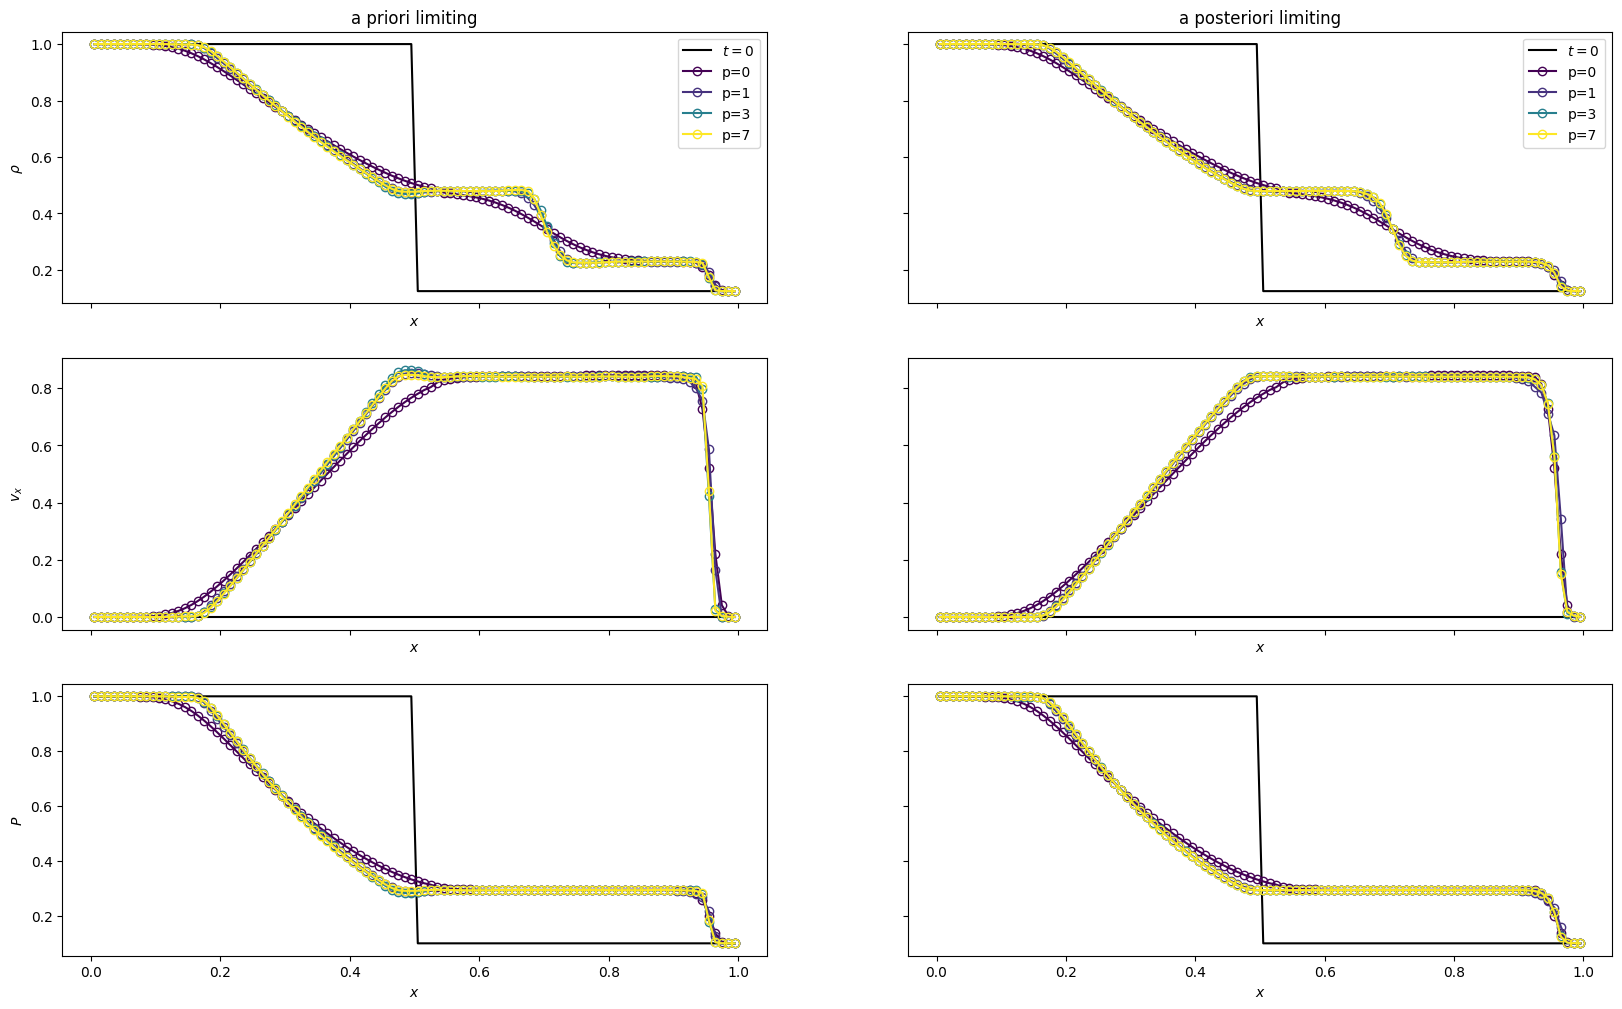

In [5]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey="row", figsize=(20, 12))
cmap = plt.get_cmap("viridis")

for limiting, group in df.groupby("limiting"):
    j = {"a priori": 0, "a posteriori": 1}[limiting]

    # Plot for p == 1 (if such a row exists)
    if (group["p"] == 1).any():
        solver = group.loc[group["p"] == 1, "solver"].iloc[0]
        solver.plot_1d_slice(
            axs[0, j], variable="rho", array="w", x=None, t=0, color="k", label="$t=0$"
        )
        solver.plot_1d_slice(
            axs[1, j], variable="vx", array="w", x=None, t=0, color="k"
        )
        solver.plot_1d_slice(axs[2, j], variable="P", array="w", x=None, t=0, color="k")

    # Plot for all p values
    for p, solver in zip(group["p"], group["solver"]):
        solver.plot_1d_slice(
            axs[0, j],
            variable="rho",
            array="w",
            x=None,
            t=0.245,
            color=cmap(p / 7),
            label=f"{p=}",
            marker="o",
            mfc="none",
        )
        solver.plot_1d_slice(
            axs[1, j],
            variable="vx",
            array="w",
            x=None,
            t=0.245,
            color=cmap(p / 7),
            marker="o",
            mfc="none",
        )
        solver.plot_1d_slice(
            axs[2, j],
            variable="P",
            array="w",
            x=None,
            t=0.245,
            color=cmap(p / 7),
            marker="o",
            mfc="none",
        )


axs[0, 0].set_title("a priori limiting")
axs[0, 1].set_title("a posteriori limiting")
axs[0, 0].legend()
axs[0, 1].legend()
axs[2, 0].set_xlabel(r"$x$")
axs[2, 1].set_xlabel(r"$x$")
axs[0, 0].set_ylabel(r"$\rho$")
axs[1, 0].set_ylabel(r"$v_x$")
axs[2, 0].set_ylabel(r"$P$")

fig.savefig("../../sod.png", dpi=300, bbox_inches="tight")

Text(0, 0.5, '$\\min E$')

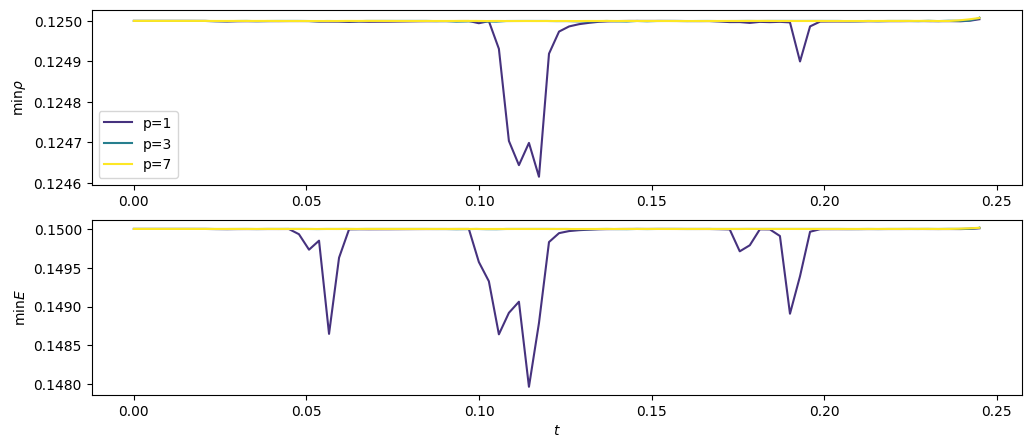

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(12, 5))

for limiting, group in df.groupby("limiting"):
    if limiting != "a posteriori":
        continue
    for p, solver in zip(group["p"], group["solver"]):
        axs[0].plot(
            solver.minisnapshots["t"],
            solver.minisnapshots["min_rho"],
            label=f"{p=}",
            color=cmap(p / 7),
        )
        axs[1].plot(
            solver.minisnapshots["t"],
            solver.minisnapshots["min_E"],
            label=f"{p=}",
            color=cmap(p / 7),
        )

axs[0].legend()
axs[1].set_xlabel(r"$t$")
axs[0].set_ylabel(r"$\min \rho$")
axs[1].set_ylabel(r"$\min E$")